# Linear and polynomial regression examples:

For the same data, we will estimate a linear model, and a polynomial model :
### Expected linear model (obtained from Excel):
y = -0,052x + 62,561

### Expected Polynomial with degree 2 model (obtained also from Excel):
y = 0,0214 x<sup>2</sup> - 2,1948 x + 96,306

## Python Code :

Import python moodules :

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

Load the data file  (directly with loadtxt or using pandas) :

In [2]:
import pandas as pd

# Load the data file
df = pd.read_csv('Linear-regression-example-data.csv',decimal=",",delimiter=";")

Print your data

In [3]:
# Display the data
print(df)

           X        Y
0    84.3590  59.8077
1    72.8205  52.5000
2    96.4103  49.4231
3     7.1795  90.1923
4    10.2564  80.9615
..       ...      ...
145  67.9487  44.0385
146  85.6410  79.4231
147  72.5641  45.5769
148  82.5641  62.5000
149  37.4359  67.8846

[150 rows x 2 columns]


Print the data shape

In [4]:
print(df.shape)

(150, 2)


Prepare your inputs and outputs

In [5]:
# Separate the input (X) and output (Y) variables
X = df['X']
Y = df['Y']

Visualize the data in a scatter plot

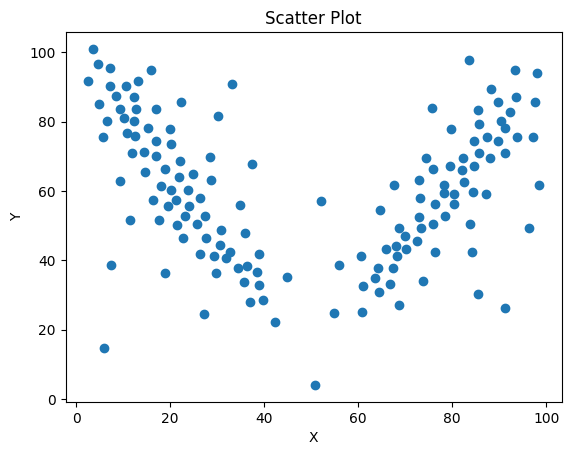

In [6]:
plt.scatter(df['X'], df['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')
plt.show()

Instanciate a linear regression model

In [7]:
model = LinearRegression()

Convert X from 1D to 2D (if necessary) :

In [8]:
X = np.array(X)  # Convert X to a numpy array
if X.ndim == 1:  # Check if X is 1-dimensional
    X = X.reshape(-1, 1)  # Reshape X to a 2-dimensional array if necessary
    

Train (Fit) your model

In [9]:
model.fit(X, Y)

LinearRegression()

Print the coefficient and the intercept of your regression

In [10]:
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [-0.05203966]
Intercept: 62.5612467676423


Calculate the prediction values of your input data

In [11]:
# Calculate the prediction values
predictions = model.predict(X)

Visualize in predicted values and output values in the same plot

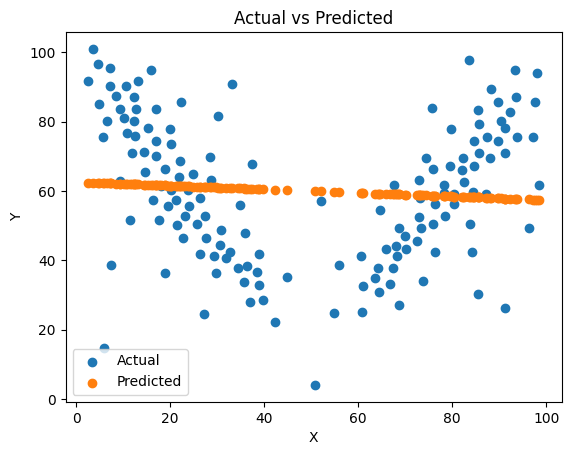

In [12]:
plt.scatter(X, Y, label='Actual')
plt.scatter(X, predictions, label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

# Polynomial model

Train a polynomial model (2nd degree) over your data

In [13]:
# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Instantiate the linear regression model for polynomial data
poly_model = LinearRegression()

# Train the model on the polynomial features
poly_model.fit(X_poly, Y)

LinearRegression()

Predict the new corresponding value for yout inputs

In [14]:
poly_predictions = poly_model.predict(X_poly)

Visualize the predicted values and your output in the same plot 

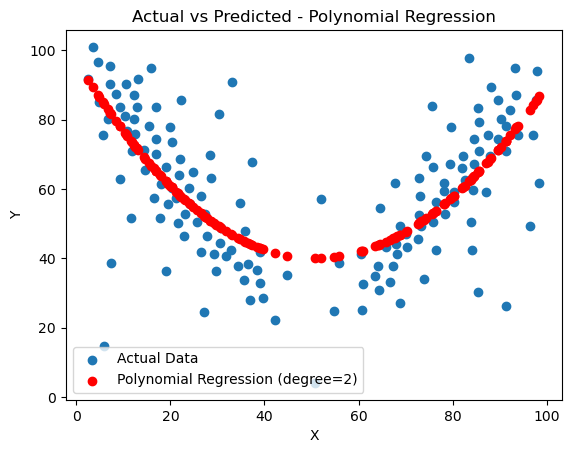

In [33]:
plt.scatter(X, Y, label='Actual Data')
plt.scatter(X, poly_predictions, color='red', label='Polynomial Regression (degree=2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs Predicted - Polynomial Regression')
plt.legend()
plt.show()

Display the coefficients of your polynom

In [15]:
# Display the polynomial coefficients
print("Polynomial Coefficients (degree=2):", poly_model.coef_)
print("Polynomial Intercept (degree=2):", poly_model.intercept_)

Polynomial Coefficients (degree=2): [ 0.         -2.19483     0.02137486]
Polynomial Intercept (degree=2): 96.30644178229142


# Exercice :
Split the data into two groups (X<50 and X>=50) and apply a linear regression for each group.

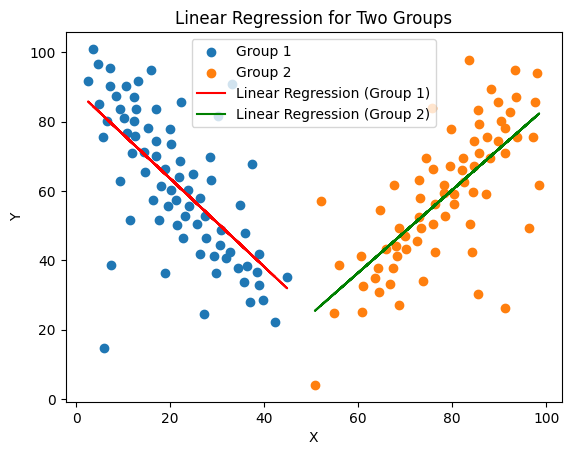

In [16]:
# Split the data into two groups
group1 = df[df['X'] < 50]
group2 = df[df['X'] >= 50]

# Linear regression for group1
model1 = LinearRegression()
model1.fit(group1[['X']], group1['Y'])

# Linear regression for group2
model2 = LinearRegression()
model2.fit(group2[['X']], group2['Y'])

# Visualize the linear regression for each group
plt.scatter(group1['X'], group1['Y'], label='Group 1')
plt.scatter(group2['X'], group2['Y'], label='Group 2')
plt.plot(group1['X'], model1.predict(group1[['X']]), color='red', label='Linear Regression (Group 1)')
plt.plot(group2['X'], model2.predict(group2[['X']]), color='green', label='Linear Regression (Group 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression for Two Groups')
plt.legend()
plt.show()
